# Shopify Code
## Author: Akash Bunde

In [46]:
import pandas as pd
import xlrd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [47]:
# ingesting data
df = pd.read_excel('data/stores.xlsx')
print("Shape of data: ", df.shape)
print("Columns in the data: ",df.columns)

Shape of data:  (5000, 7)
Columns in the data:  Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')


In [48]:
# Creating a reference variable to evaluate outliers
df["avg_shoe_price"] = df["order_amount"]/df["total_items"]

{'whiskers': [<matplotlib.lines.Line2D at 0x12051989ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x120503585e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12051989b80>],
 'medians': [<matplotlib.lines.Line2D at 0x12050358ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1205035a040>],
 'means': []}

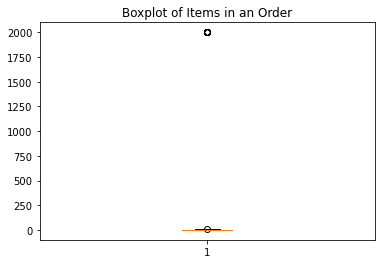

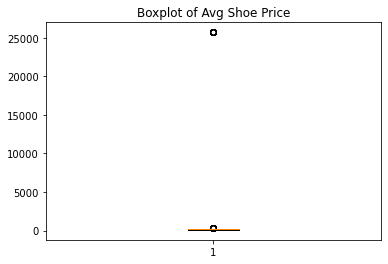

In [49]:
# Box plots to identify outliers
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot of Items in an Order')
ax1.boxplot(df.total_items)

fig2, ax2 = plt.subplots()
ax2.set_title('Boxplot of Avg Shoe Price')
ax2.boxplot(df.avg_shoe_price)

Number of shoes priced higher than $500:  46


(array([ 420., 1478., 1847.,  990.,  168.,    0.,    0.,    0.,    0.,
          51.]),
 array([ 90. , 116.2, 142.4, 168.6, 194.8, 221. , 247.2, 273.4, 299.6,
        325.8, 352. ]),
 <BarContainer object of 10 artists>)

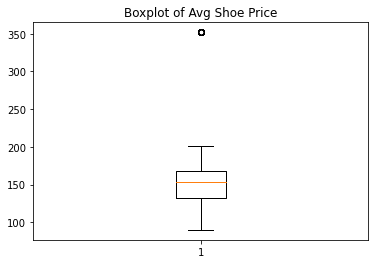

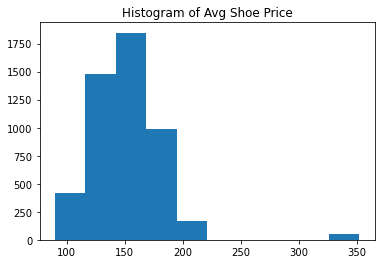

In [50]:
# Removing outliers from data
print("Number of shoes priced higher than $500: ", len(df[df["avg_shoe_price"]>500]))
df_clean_tst = df[df["avg_shoe_price"]<500]
df_clean_tst.shape

# verifying outliers
fig2, ax1 = plt.subplots()
ax1.set_title('Boxplot of Avg Shoe Price')
ax1.boxplot(df_clean_tst.avg_shoe_price)

fig3, ax1 = plt.subplots()
ax1.set_title('Histogram of Avg Shoe Price')
ax1.hist(df_clean_tst.avg_shoe_price)



AOV: $ 300.16


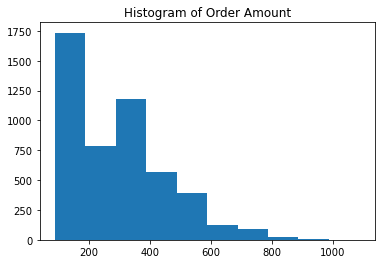

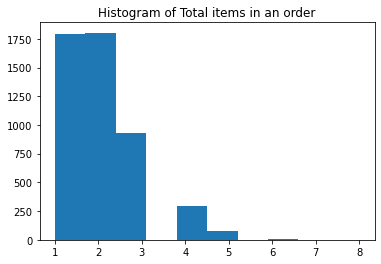

In [51]:
# Cleaning df
df_clean = df[df["avg_shoe_price"]<250]

# Visualizing order amount
fig4, ax1 = plt.subplots()
ax1.set_title('Histogram of Order Amount')
ax1.hist(df_clean.order_amount)

fig5, ax1 = plt.subplots()
ax1.set_title('Histogram of Total items in an order')
ax1.hist(df_clean.total_items)


# calculating average order value from the cleaned data set
print("AOV: $",round(df_clean["order_amount"].mean(),2))

